In [81]:
from bokeh.io import output_notebook, push_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider, ColumnDataSource, CDSView, GroupFilter
from bokeh.plotting import reset_output
 


import numpy as np
import pandas as pd
import missingno as msno




In [82]:
bats_man=pd.read_csv('./Batsman_Data.csv')
player_data=pd.read_csv('./WC_players.csv')
match_results=pd.read_csv('./ODI_Match_Result.csv')

# Match Results Processing

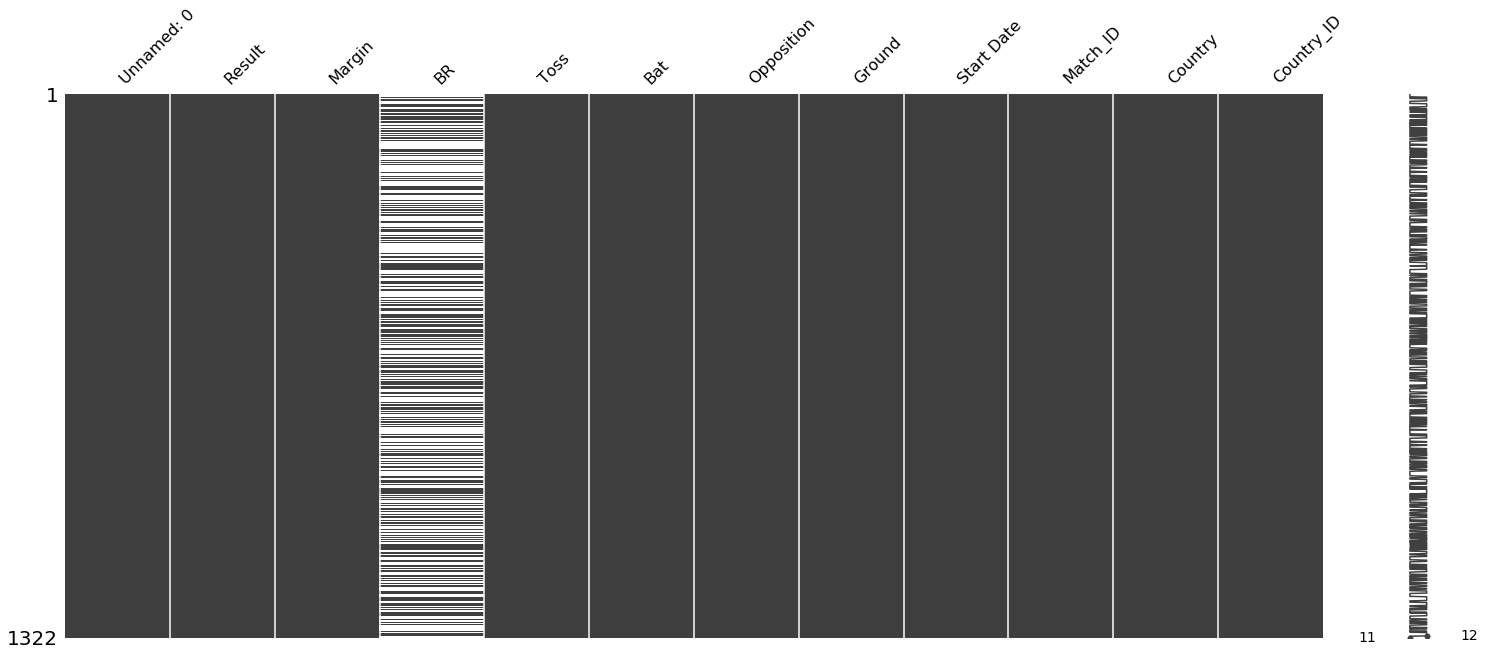

In [83]:
msno.matrix(match_results)

In [84]:
match_results.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [85]:
match_results.drop(columns=['BR','Unnamed: 0'],inplace=True)

In [86]:
match_results['Opposition']=match_results['Opposition'].str.replace('v ','').str.strip()
match_results['Match_ID']=match_results['Match_ID'].str.replace('ODI #','').str.strip()
match_results['Start Date'] = pd.to_datetime(match_results['Start Date'])
match_results['Year']=match_results['Start Date'].apply(lambda x : x.year)

In [87]:
match_results.Country.unique()

array(['Pakistan', 'India', 'SriLanka', 'Australia', 'England',
       'SouthAfrica', 'Newzealad', 'WestIndies', 'Afghanistan',
       'Bangladesh'], dtype=object)

In [88]:
match_results_india=match_results[match_results['Country']=='India']

In [89]:
match_results_india.head()

,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
1,lost,85 runs,won,2nd,Pakistan,Kolkata,2013-01-03,3315,India,6,2013
3,won,10 runs,won,1st,Pakistan,Delhi,2013-01-06,3316,India,6,2013
6,lost,9 runs,lost,2nd,England,Rajkot,2013-01-11,3318,India,6,2013
10,won,127 runs,won,1st,England,Kochi,2013-01-15,3320,India,6,2013
14,won,7 wickets,won,2nd,England,Ranchi,2013-01-19,3322,India,6,2013


In [90]:
print(match_results_india.Match_ID.nunique())

160


In [91]:
print(match_results_india.Match_ID.unique())

['3315' '3316' '3318' '3320' '3322' '3327' '3329' '3363' '3368' '3372'
 '3376' '3377' '3380' '3382' '3383' '3387' '3388' '3395' '3397' '3399'
 '3402' '3403' '3419' '3420' '3421' '3422' '3422a' '3424' '3428' '3436'
 '3437' '3439' '3442' '3443' '3444' '3456' '3458' '3462' '3465' '3467'
 '3474' '3476' '3479' '3483' '3497' '3498' '3499' '3513a' '3517' '3520'
 '3523' '3525' '3531' '3533' '3534a' '3535' '3535a' '3539' '3540' '3543'
 '3544' '3547' '3582' '3586' '3592' '3595' '3602' '3610' '3618' '3625'
 '3631' '3636' '3641' '3645' '3658' '3660' '3661' '3662' '3665' '3667'
 '3689' '3692' '3695' '3698' '3700' '3723' '3724' '3725' '3726' '3727'
 '3742' '3744' '3746' '3796' '3797' '3798' '3799' '3800' '3819' '3821'
 '3824' '3878' '3882' '3886' '3891' '3894' '3895' '3896' '3898' '3900'
 '3902' '3905' '3906' '3907' '3908' '3909' '3910' '3912' '3914' '3917'
 '3919' '3928' '3931' '3932' '3939' '3941' '3942' '3969' '3970' '3971'
 '3973' '3976' '3978' '4014' '4016' '4018' '4039' '4040' '4042' '4044'
 '

In [92]:
match_results_india[match_results_india.Match_ID.isin(['3422a','3422','3513a','3534a'])]

,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
173,n/r,-,won,2nd,Australia,Ranchi,2013-10-23,3422,India,6,2013
175,aban,-,-,-,Australia,Cuttack,2013-10-26,3422a,India,6,2013
337,aban,-,-,-,England,Bristol,2014-08-25,3513a,India,6,2014
373,canc,-,-,-,West Indies,Visakhapatnam,2014-10-14,3534a,India,6,2014


In [93]:
match_results_india.Result.unique()

array(['lost', 'won', 'n/r', 'aban', 'tied', 'canc'], dtype=object)

In [94]:
match_results_india.Match_ID.unique()

array(['3315', '3316', '3318', '3320', '3322', '3327', '3329', '3363',
       '3368', '3372', '3376', '3377', '3380', '3382', '3383', '3387',
       '3388', '3395', '3397', '3399', '3402', '3403', '3419', '3420',
       '3421', '3422', '3422a', '3424', '3428', '3436', '3437', '3439',
       '3442', '3443', '3444', '3456', '3458', '3462', '3465', '3467',
       '3474', '3476', '3479', '3483', '3497', '3498', '3499', '3513a',
       '3517', '3520', '3523', '3525', '3531', '3533', '3534a', '3535',
       '3535a', '3539', '3540', '3543', '3544', '3547', '3582', '3586',
       '3592', '3595', '3602', '3610', '3618', '3625', '3631', '3636',
       '3641', '3645', '3658', '3660', '3661', '3662', '3665', '3667',
       '3689', '3692', '3695', '3698', '3700', '3723', '3724', '3725',
       '3726', '3727', '3742', '3744', '3746', '3796', '3797', '3798',
       '3799', '3800', '3819', '3821', '3824', '3878', '3882', '3886',
       '3891', '3894', '3895', '3896', '3898', '3900', '3902', '3905',
  

In [95]:
print(match_results_india.shape)
print(match_results_india.Opposition.unique())

(160, 11)
['Pakistan' 'England' 'South Africa' 'West Indies' 'Sri Lanka' 'Zimbabwe'
 'Australia' 'New Zealand' 'Bangladesh' 'Afghanistan' 'U.A.E.' 'Ireland'
 'Hong Kong']


In [96]:
match_results_india=match_results_india.reset_index()

In [97]:
match_results_india.head()

,index,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
0,1,lost,85 runs,won,2nd,Pakistan,Kolkata,2013-01-03,3315,India,6,2013
1,3,won,10 runs,won,1st,Pakistan,Delhi,2013-01-06,3316,India,6,2013
2,6,lost,9 runs,lost,2nd,England,Rajkot,2013-01-11,3318,India,6,2013
3,10,won,127 runs,won,1st,England,Kochi,2013-01-15,3320,India,6,2013
4,14,won,7 wickets,won,2nd,England,Ranchi,2013-01-19,3322,India,6,2013


In [98]:
match_results_india[match_results_india['Year']==2013].groupby(['Opposition','Result'])['index'].count().reset_index()

,Opposition,Result,index
0,Australia,aban,1
1,Australia,lost,2
2,Australia,n/r,1
3,Australia,won,3
4,England,lost,2
5,England,won,4
6,Pakistan,lost,1
7,Pakistan,won,2
8,South Africa,lost,2
9,South Africa,n/r,1


In [99]:
b=match_results_india.Match_ID.unique()

# Bats_man Processing

In [100]:
bats_man.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [101]:
bats_man.drop(columns=['Unnamed: 0'],inplace=True)

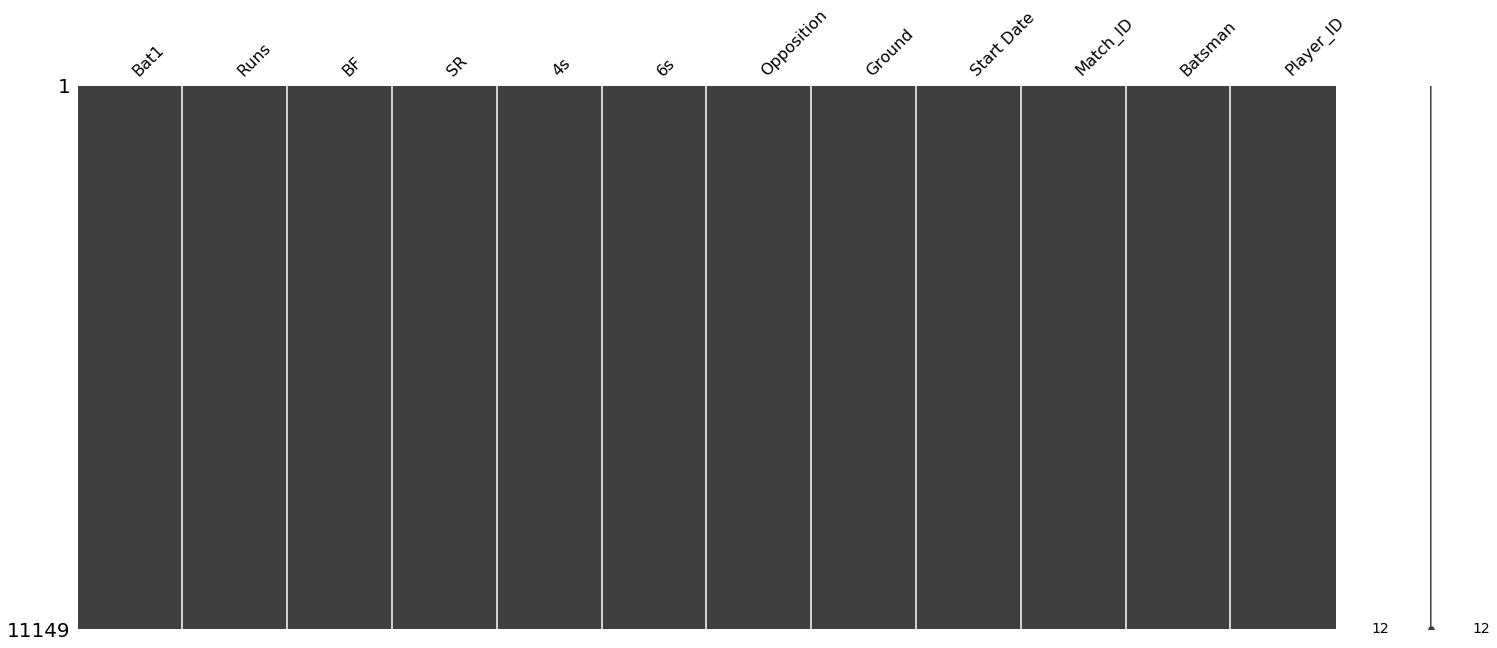

In [102]:
msno.matrix(bats_man)

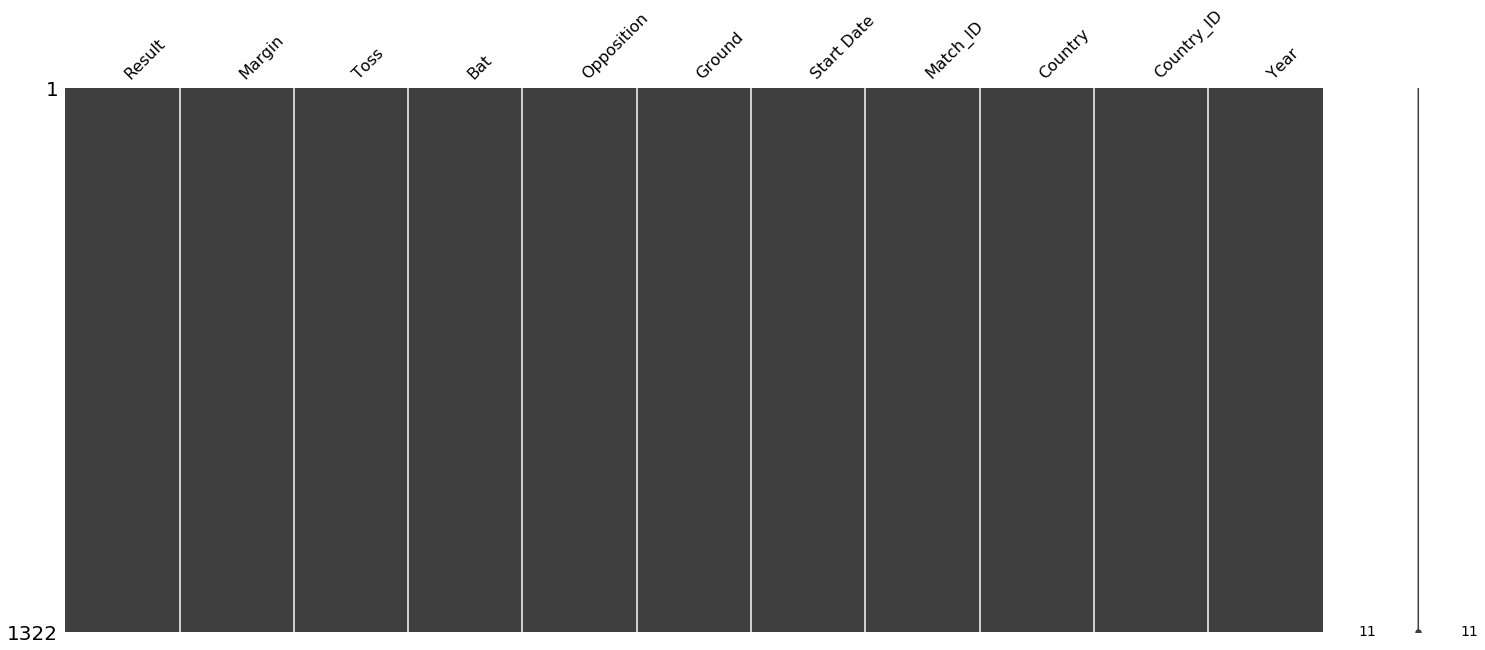

In [103]:
msno.matrix(match_results)

In [104]:
bats_man.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [105]:
bats_man.Bat1.unique()

array(['DNB', '0*', '1*', '0', '1', '2*', '4*', '3', '7*', '8', '7', '3*',
       '10', 'TDNB', '20*', '26', '23*', '11*', '5*', '2', '5', '12',
       '20', '49', '92*', '25', '22', '11', '40*', '29', '53', '37', '34',
       '41', '42*', '59*', '9', '43', '18', '4', '6*', '46', '19', '16',
       '64*', '24', '27*', '13', '12*', '24*', '9*', '14*', '8*', '26*',
       '15*', '6', '21', '34*', '44', '10*', '19*', '31*', '27', '40',
       '25*', '13*', '14', '148', '47', '33', '35', '176*', '76', '31',
       '64', '66', '17', '101', '15', '71', '48*', '81', '51', '72', '23',
       '35*', '49*', '32', '123*', '95', '146*', '108*', '170', '109',
       '30', '87', '74', '127', '36', '38', '52', '125', '106', '94',
       '104*', '28*', '45*', '39', '79', '73', '67', '86', '60', '28',
       '100*', '72*', '55', '70', '54', '59', '50', '51*', '124', '102',
       '61', '33*', '58*', '42', '152', '85', '62', '84', '103', '140',
       '119', '153*', '112*', '152*', '60*', '132*', '99', 

In [106]:
bats_man.groupby(['Bat1'])['Player_ID'].count()

Bat1
0          655
0*         145
1          338
1*         100
10         148
10*         30
100         11
100*        11
101         17
101*         5
102         17
102*         9
103         10
103*         4
104          8
104*         4
105          9
105*         3
106         12
106*         2
107         13
107*         2
108          6
108*         4
109         11
109*         1
11         168
11*         26
110          9
110*         8
          ... 
87          14
87*          5
88           8
88*          4
89           6
89*          3
9          165
9*          32
90          13
90*          4
91           6
91*          6
92          11
92*          4
93           9
93*          1
94          10
95          15
95*          3
96           7
96*          2
97           6
97*          4
98           7
99           9
99*          1
DNB       2043
TDNB       182
absent       3
sub          3
Name: Player_ID, Length: 323, dtype: int64

In [107]:
bats_man.shape

(11149, 12)

In [108]:
bats_man.shape

(11149, 12)

In [109]:
bats_man.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [110]:
bats_man['status']=np.where(bats_man['Bat1'].str.contains('*',regex=False),'not-out','out')

In [111]:
bats_man.drop(columns=['Bat1'],inplace=True)

In [112]:
player_data.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [113]:
player_data.dtypes

Player     object
ID          int64
Country    object
dtype: object

In [114]:
# Check if there are any players that are in bats_men but not in player data
bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))].shape

(81, 12)

In [115]:
print(bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))]['Player_ID'].nunique())
print(bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))]['Player_ID'].unique())

1
[49619]


In [116]:
bats_man[bats_man['Player_ID']==49619].head()


,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status
0,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619,out
1,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619,out
2,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619,out
3,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619,out
4,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619,out


In [117]:
player_data[player_data['Player']=='Oshane Thomas']


,Player,ID,Country
151,Oshane Thomas,914567,WestIndies


In [118]:
player_data['ID']=np.where(player_data['Player']=='Oshane Thomas',49619,player_data['ID'])

In [119]:
bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))]

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status
81,-,-,-,-,-,v India,Guwahati,21 Oct 2018,ODI # 4056,Oshane Thomas,914567,out
82,0,2,0.00,0,0,v India,Thiruvananthapuram,1 Nov 2018,ODI # 4064,Oshane Thomas,914567,out
83,0,2,0.00,0,0,v Bangladesh,Dhaka,9 Dec 2018,ODI # 4071,Oshane Thomas,914567,not-out
84,-,-,-,-,-,v Bangladesh,Dhaka,11 Dec 2018,ODI # 4072,Oshane Thomas,914567,out
85,-,-,-,-,-,v England,Bridgetown,20 Feb 2019,ODI # 4096,Oshane Thomas,914567,out
86,-,-,-,-,-,v England,Bridgetown,22 Feb 2019,ODI # 4097,Oshane Thomas,914567,out
87,-,-,-,-,-,v England,St George's,25 Feb 2019,ODI # 4098,Oshane Thomas,914567,out
88,0,1,0.00,0,0,v England,St George's,27 Feb 2019,ODI # 4099,Oshane Thomas,914567,out
89,-,-,-,-,-,v England,Gros Islet,2 Mar 2019,ODI # 4103,Oshane Thomas,914567,out


In [120]:
bats_man['Player_ID']=np.where(bats_man['Batsman']=='Oshane Thomas',49619,bats_man['Player_ID'])

In [121]:
bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))]

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status


In [122]:
bats_man=bats_man.merge(player_data,how='inner',left_on='Player_ID',right_on='ID')

In [123]:
bats_man.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status,Player,ID,Country
0,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies
1,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies
2,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies
3,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies
4,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies


In [124]:
bats_man['Start Date'] = pd.to_datetime(bats_man['Start Date'])
bats_man['Year']=bats_man['Start Date'].apply(lambda x : x.year)
bats_man['Match_ID']=bats_man['Match_ID'].str.replace('ODI #','').str.strip()
bats_man['Opposition']=bats_man['Opposition'].str.replace('v ','').str.strip()

In [125]:
bats_man.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status,Player,ID,Country,Year
0,-,-,-,-,-,India,Nagpur,2009-12-18,2933,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies,2009
1,-,-,-,-,-,India,Kolkata,2009-12-24,2935,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies,2009
2,-,-,-,-,-,India,Delhi,2009-12-27,2936,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies,2009
3,-,-,-,-,-,Bangladesh,Dhaka,2010-01-04,2937,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies,2010
4,-,-,-,-,-,India,Dhaka,2010-01-05,2938,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies,2010


In [126]:
bats_man[bats_man['Country']=='India'].Player.unique()

array(['Mohammed Shami', 'Ravindra Jadeja', 'Hardik Pandya',
       'Jasprit Bumrah', 'Bhuvneshwar Kumar', 'Kuldeep Yadav',
       'Yuzvendra Chahal', 'Dinesh Karthik', 'Kedar Jadhav',
       'MS Dhoni (wk)', 'Vijay Shankar', 'K. L. Rahul', 'Shikhar Dhawan',
       'Rohit Sharma (vc)', 'Virat Kohli (c)'], dtype=object)

In [127]:
bats_man.drop(columns=['ID','Ground','Player'],inplace=True)

In [128]:
bats_man.Country.unique()

array(['WestIndies', 'SriLanka', 'SouthAfrica', 'Pakistan', 'NewZealand',
       'India', 'England', 'Bangladesh', 'Australia', 'Afghanistan'],
      dtype=object)

In [129]:
bats_man_india=bats_man[bats_man['Country']=='India']

In [130]:
bats_man_india.head()

,Runs,BF,SR,4s,6s,Opposition,Start Date,Match_ID,Batsman,Player_ID,status,Country,Year
5330,0,5,0.00,0,0,Pakistan,2013-01-06,3316,Mohammed Shami,481896,not-out,India,2013
5331,-,-,-,-,-,England,2013-01-15,3320,Mohammed Shami,481896,out,India,2013
5332,-,-,-,-,-,England,2013-01-19,3322,Mohammed Shami,481896,out,India,2013
5333,-,-,-,-,-,England,2013-01-23,3327,Mohammed Shami,481896,out,India,2013
5334,1,6,16.66,0,0,England,2013-01-27,3329,Mohammed Shami,481896,out,India,2013


In [131]:
bats_man_india.Year.unique()

array([2013, 2014, 2015, 2017, 2018, 2019, 2009, 2010, 2011, 2012, 2016,
       2004, 2006, 2007, 2005, 2008])

In [132]:
bats_man_india=bats_man_india[bats_man_india['Year'].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019])]

In [133]:
bats_man_india.Player_ID.unique()

array([481896, 234675, 625371, 625383, 326016, 559235, 430246,  30045,
       290716,  28081, 477021, 422108,  28235,  34102, 253802])

In [134]:
bats_man_india.Batsman.unique()

array(['Mohammed Shami', 'Ravindra Jadeja', 'Hardik Pandya',
       'Jasprit Bumrah', 'Bhuvneshwar Kumar', 'Kuldeep Yadav',
       'Yuzvendra Chahal', 'Dinesh Karthik', 'Kedar Jadhav', 'MS Dhoni ',
       'Vijay Shankar', 'K. L. Rahul', 'Shikhar Dhawan', 'Rohit Sharma ',
       'Virat Kohli '], dtype=object)

In [135]:
bats_man_india.Match_ID.nunique()

153

In [136]:
bats_man_india.shape

(1068, 13)

In [137]:
bats_man_india[bats_man_india['Match_ID']=='3316']

,Runs,BF,SR,4s,6s,Opposition,Start Date,Match_ID,Batsman,Player_ID,status,Country,Year
5330,0,5,0.00,0,0,Pakistan,2013-01-06,3316,Mohammed Shami,481896,not-out,India,2013
5452,27,39,69.23,0,2,Pakistan,2013-01-06,3316,Ravindra Jadeja,234675,out,India,2013
5640,2,10,20.00,0,0,Pakistan,2013-01-06,3316,Bhuvneshwar Kumar,326016,out,India,2013
6191,36,55,65.45,1,3,Pakistan,2013-01-06,3316,MS Dhoni,28081,out,India,2013
6768,7,17,41.17,1,0,Pakistan,2013-01-06,3316,Virat Kohli,253802,out,India,2013


In [138]:
bats_man_india.groupby(['Batsman','Year'])['Match_ID'].count().sort_values().reset_index()

,Batsman,Year,Match_ID
0,Kedar Jadhav,2014,1
1,K. L. Rahul,2019,1
2,Bhuvneshwar Kumar,2016,2
3,Mohammed Shami,2018,2
4,Yuzvendra Chahal,2016,3
5,K. L. Rahul,2018,3
6,K. L. Rahul,2016,3
7,Kedar Jadhav,2015,3
8,Hardik Pandya,2019,3
9,Mohammed Shami,2017,3


In [139]:
a=bats_man_india.Match_ID.unique()

In [140]:
print(len(a))
print(len(b))

153
160


In [141]:
set(a)-set(b)

set()

In [142]:
set(b)-set(a)

{'3422a', '3497', '3498', '3499', '3513a', '3534a', '3535a'}

In [143]:
match_results_india[match_results_india['Match_ID'].isin(['3422a', '3444', '3497', '3498', '3499', '3513a', '3534a', '3535a'])]

,index,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
26,175,aban,-,-,-,Australia,Cuttack,2013-10-26,3422a,India,6,2013
34,220,n/r,-,lost,2nd,South Africa,Centurion,2013-12-11,3444,India,6,2013
44,311,won,7 wickets,lost,2nd,Bangladesh,Dhaka,2014-06-15,3497,India,6,2014
45,313,won,47 runs,lost,1st,Bangladesh,Dhaka,2014-06-17,3498,India,6,2014
46,315,n/r,-,won,1st,Bangladesh,Dhaka,2014-06-19,3499,India,6,2014
47,337,aban,-,-,-,England,Bristol,2014-08-25,3513a,India,6,2014
54,373,canc,-,-,-,West Indies,Visakhapatnam,2014-10-14,3534a,India,6,2014
56,377,canc,-,-,-,West Indies,Kolkata,2014-10-20,3535a,India,6,2014


In [144]:
match_results_india=match_results_india[~match_results_india['Match_ID'].isin(['3422a', '3444', '3497', '3498', '3499', '3513a', '3534a', '3535a'])]

In [145]:
b2=match_results_india.Match_ID.unique()

In [146]:
a=bats_man_india.Match_ID.unique()

In [147]:
print(set(b2)-set(a))
print(set(a)-set(b2))

set()
{'3444'}


In [148]:
print(bats_man_india.shape)
print(bats_man_india.dtypes)
bats_man_india.head(2)

(1068, 13)
Runs                  object
BF                    object
SR                    object
4s                    object
6s                    object
Opposition            object
Start Date    datetime64[ns]
Match_ID              object
Batsman               object
Player_ID              int64
status                object
Country               object
Year                   int64
dtype: object


,Runs,BF,SR,4s,6s,Opposition,Start Date,Match_ID,Batsman,Player_ID,status,Country,Year
5330,0,5,0.00,0,0,Pakistan,2013-01-06,3316,Mohammed Shami,481896,not-out,India,2013
5331,-,-,-,-,-,England,2013-01-15,3320,Mohammed Shami,481896,out,India,2013


In [149]:
print(match_results_india.shape)
print(match_results_india.dtypes)
match_results_india.head(2)

(152, 12)
index                  int64
Result                object
Margin                object
Toss                  object
Bat                   object
Opposition            object
Ground                object
Start Date    datetime64[ns]
Match_ID              object
Country               object
Country_ID             int64
Year                   int64
dtype: object


,index,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
0,1,lost,85 runs,won,2nd,Pakistan,Kolkata,2013-01-03,3315,India,6,2013
1,3,won,10 runs,won,1st,Pakistan,Delhi,2013-01-06,3316,India,6,2013


In [150]:
match_results_india['Match_ID'].unique()

array(['3315', '3316', '3318', '3320', '3322', '3327', '3329', '3363',
       '3368', '3372', '3376', '3377', '3380', '3382', '3383', '3387',
       '3388', '3395', '3397', '3399', '3402', '3403', '3419', '3420',
       '3421', '3422', '3424', '3428', '3436', '3437', '3439', '3442',
       '3443', '3456', '3458', '3462', '3465', '3467', '3474', '3476',
       '3479', '3483', '3517', '3520', '3523', '3525', '3531', '3533',
       '3535', '3539', '3540', '3543', '3544', '3547', '3582', '3586',
       '3592', '3595', '3602', '3610', '3618', '3625', '3631', '3636',
       '3641', '3645', '3658', '3660', '3661', '3662', '3665', '3667',
       '3689', '3692', '3695', '3698', '3700', '3723', '3724', '3725',
       '3726', '3727', '3742', '3744', '3746', '3796', '3797', '3798',
       '3799', '3800', '3819', '3821', '3824', '3878', '3882', '3886',
       '3891', '3894', '3895', '3896', '3898', '3900', '3902', '3905',
       '3906', '3907', '3908', '3909', '3910', '3912', '3914', '3917',
      

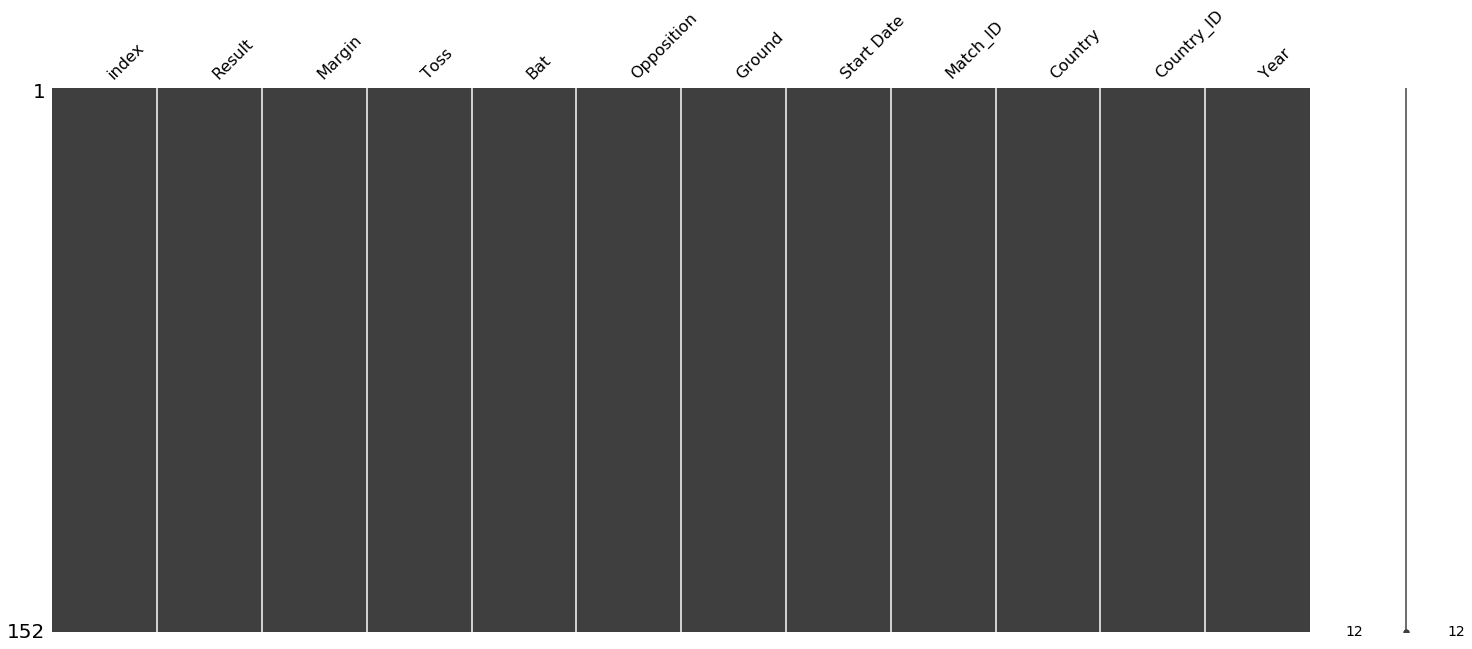

In [151]:
msno.matrix(match_results_india)

In [152]:
bats_man_india['Match_ID']=bats_man_india.Match_ID.astype(int)
match_results_india['Match_ID']=match_results_india.Match_ID.astype(int)

In [153]:
match_results_india.groupby(['Result'])['index'].count()

Result
lost    49
n/r      3
tied     3
won     97
Name: index, dtype: int64

In [154]:
bats_man_data=bats_man_india.join(match_results_india.set_index('Match_ID'),on='Match_ID',lsuffix='_bats', rsuffix='_match')

In [155]:
bats_man_data.head(1)

,Runs,BF,SR,4s,6s,Opposition_bats,Start Date_bats,Match_ID,Batsman,Player_ID,...,Result,Margin,Toss,Bat,Opposition_match,Ground,Start Date_match,Country_match,Country_ID,Year_match
5330,0,5,0.00,0,0,Pakistan,2013-01-06,3316,Mohammed Shami,481896,...,won,10 runs,won,1st,Pakistan,Delhi,2013-01-06,India,6.0,2013.0


In [156]:
list(bats_man_data)

['Runs',
 'BF',
 'SR',
 '4s',
 '6s',
 'Opposition_bats',
 'Start Date_bats',
 'Match_ID',
 'Batsman',
 'Player_ID',
 'status',
 'Country_bats',
 'Year_bats',
 'index',
 'Result',
 'Margin',
 'Toss',
 'Bat',
 'Opposition_match',
 'Ground',
 'Start Date_match',
 'Country_match',
 'Country_ID',
 'Year_match']

In [157]:
bats_man_data.drop(columns=['Player_ID','Country_bats','index','Opposition_match','Ground','Start Date_match','Country_match',
'Country_ID','Year_match'],inplace=True)

In [177]:
bats_man_data.head(5)

,Runs,BF,SR,4s,6s,Opposition_bats,Start Date_bats,Match_ID,Batsman,status,Year_bats,Result,Margin,Toss,Bat,cumruns
5330,0,5,0.00,0,0,Pakistan,2013-01-06,3316,Mohammed Shami,not-out,2013,won,10 runs,won,1st,0
5331,0,-,-,-,-,England,2013-01-15,3320,Mohammed Shami,out,2013,won,127 runs,won,1st,0
5332,0,-,-,-,-,England,2013-01-19,3322,Mohammed Shami,out,2013,won,7 wickets,won,2nd,0
5333,0,-,-,-,-,England,2013-01-23,3327,Mohammed Shami,out,2013,won,5 wickets,won,2nd,0
5334,1,6,16.66,0,0,England,2013-01-27,3329,Mohammed Shami,out,2013,lost,7 wickets,lost,1st,1


In [168]:
bats_man_data.Runs=bats_man_data.Runs.str.replace('-','0').astype(int)

In [169]:
bats_man_data['cumruns']=bats_man_data['Runs'].cumsum()

In [178]:
bats_man_data[(bats_man_data['Batsman']=='Shikhar Dhawan') & (bats_man_data['Year_bats']==2019)].groupby(['Match_ID','4s'])['Runs'].sum().sort_values().reset_index().sort_values(by=['Match_ID'])

,Match_ID,4s,Runs
0,4077,0,0
9,4078,5,32
7,4079,0,23
11,4082,6,75
10,4085,9,66
8,4088,6,28
5,4091,1,13
3,4092,1,6
1,4102,0,0
6,4106,4,21


In [176]:
max(bats_man_data.groupby(['Batsman','Year_bats','Match_ID'])['cumruns'].sum().sort_values().reset_index()['cumruns'])

26878

In [184]:
yr=2019
bats_man_name_init='Shikhar Dhawan'
temp=bats_man_data[(bats_man_data['Batsman']==bats_man_name_init) & (bats_man_data['Year_bats']==yr)].groupby(['Match_ID','6s'])['Runs'].sum().sort_values().reset_index().sort_values(by=['Match_ID'])

In [190]:
temp.rename({'6s': 'shots'},axis='columns',inplace=True)
temp

,Match_ID,shots,Runs
0,4077,0,0
9,4078,0,32
7,4079,0,23
11,4082,0,75
10,4085,0,66
8,4088,0,28
5,4091,1,13
3,4092,0,6
1,4102,0,0
6,4106,0,21


In [191]:
bats_man_data.Opposition_bats.unique()

array(['Pakistan', 'England', 'Sri Lanka', 'Zimbabwe', 'Australia',
       'West Indies', 'South Africa', 'New Zealand', 'Bangladesh',
       'Afghanistan', 'Ireland', 'U.A.E.', 'Hong Kong'], dtype=object)

In [193]:
oppo_name='New Zealand'
bats_man_data[(bats_man_data['Batsman']==bats_man_name_init) & (bats_man_data['Year_bats']==yr) & (bats_man_data['Opposition_bats']==oppo_name)].groupby(['Match_ID','6s'])['Runs'].sum().sort_values().reset_index().sort_values(by=['Match_ID'])

,Match_ID,6s,Runs
4,4082,0,75
3,4085,0,66
2,4088,0,28
1,4091,1,13
0,4092,0,6


In [195]:
a=[1,2,3]
a.insert(0,0)
a

[0, 1, 2, 3]

# Sample Run

In [ ]:
result=['W','L','W','W','W','W','W','L','T','W']
home_team=['India','India','India','India','India','India','India','India','India','India']
oppo_team=['Australia','Australia','England','WestIndies','Pakistan','Pakistan','SriLanka','England','Newzealand','England']
matches=pd.DataFrame(data={'result':result,
                    'home_team':home_team,
                           'oppo_team':oppo_team})
matches

In [ ]:
source1=matches[matches['result']=='W'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()

In [ ]:
source1

In [ ]:

source1=matches[matches['result']=='W'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
output_file('test_file')
fig = figure(title='Test Plot',y_range=[0,5],x_range=list(source1.oppo_team.unique()))
source_data= ColumnDataSource(source1)
fig.circle(x='oppo_team',y='home_team',source=source_data,size=20)

from bokeh.io import output_file, show
from bokeh.models.widgets import RadioGroup
from bokeh.layouts import widgetbox, row
from bokeh.io import curdoc

radio_button_group = RadioGroup(
        labels=["W", "L"], active=0)

def update_fig(attr, old, new):
    # set the `yr` name to `slider.value` and `source.data = new_data`
    mat_res = radio_button_group.active
    new_source=matches[matches['result']==mat_res].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
    
    source_data = new_source

# Attach the callback to the 'value' property of button
radio_button_group.on_change('active', lambda attr, old, new: update_fig())

# Make a row layout of widgetbox(slider) and plot and add it to the current document
layout = row(widgetbox(radio_button_group), fig)
curdoc().add_root(layout)


In [ ]:
reset_output()

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider, ColumnDataSource, CDSView, GroupFilter
from bokeh.plotting import reset_output

import numpy as np
import pandas as pd
import missingno as msno

result=['W','L','W','W','W','W','W','L','T','W']
home_team=['India','India','India','India','India','India','India','India','India','India']
oppo_team=['Australia','Australia','England','WestIndies','Pakistan','Pakistan','SriLanka','England','Newzealand','England']
matches=pd.DataFrame(data={'result':result,
                    'home_team':home_team,
                           'oppo_team':oppo_team})

#print(matches)

source1=matches[matches['result']=='L'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
output_notebook()
fig = figure(title='Test Plot',y_range=[0,5],
            x_range=list(matches.oppo_team.unique()))
source_data= ColumnDataSource(source1)
fig.circle(x='oppo_team',y='home_team',source=source_data,size=20)

from bokeh.io import output_file, show
from bokeh.models.widgets import RadioButtonGroup
from bokeh.layouts import widgetbox, row
from bokeh.io import curdoc



def update():
    button_value= radio_button_group.active
    print('Button value  is : ', button_value)
    if button_value ==1:
        new_source=matches[matches['result']=='W'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
    else:
        new_source=matches[matches['result']=='L'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
    new_source_cds= ColumnDataSource(new_source)
    source_data.data=new_source_cds.data
    push_notebook()
    
radio_button_group = RadioButtonGroup(
        labels=['Loss', 'Win'], active=0)

radio_button_group.on_change('active', lambda attr, old, new: update())

# Make a row layout of widgetbox(slider) and plot and add it to the current document
layout = row(widgetbox(radio_button_group), fig)
show(layout,notebook_handle=True)

In [ ]:
from ipywidgets import interact
radio_button_group=RadioButtonGroup(
        labels=['Loss', 'Win'], active=1)
interact(update())

In [ ]:
from ipywidgets import interact
radio_button_group=RadioButtonGroup(
        labels=['Loss', 'Win'], active=0)
interact(update())